In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ourdata=pd.read_excel('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/totalfin.xlsx')
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
ourdata['Year']=ourdata['Period'].dt.year

In [3]:
ourdata['Month'] = ourdata['Period'].dt.month

In [4]:
ourdata=ourdata[ourdata['Year'].isin([2022,2023])]

In [5]:
ourdata = ourdata[~ourdata['Category'].str.contains('investment', case=False)]

In [6]:
ourdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 157 to 1383
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          1219 non-null   datetime64[ns]
 1   Accounts        1219 non-null   object        
 2   Category        1219 non-null   object        
 3   Subcategory     449 non-null    object        
 4   Note            1219 non-null   object        
 5   USD             1219 non-null   float64       
 6   Income/Expense  1219 non-null   object        
 7   Description     632 non-null    object        
 8   Amount          1219 non-null   float64       
 9   Currency        1219 non-null   object        
 10  Accounts.1      1219 non-null   float64       
 11  Year            1219 non-null   int32         
 12  Month           1219 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 123.8+ KB


In [7]:
ourdata.head()


,Period,Accounts,Category,Subcategory,Note,USD,Income/Expense,Description,Amount,Currency,Accounts.1,Year,Month
157,2023-12-31,Amex,Groceries,NaN,Walmart,25.51,Exp.,WAL-MART SUPERCENTERLITTLE ROCK AR,25.51,USD,25.51,2023,12
158,2023-12-31,Amex,Groceries,NaN,Indian Market,26.63,Exp.,INDIAN MARKET LITTLE ROCK AR,26.63,USD,26.63,2023,12
159,2023-12-31,Amex,Groceries,NaN,Indian Market,3.78,Exp.,INDIAN MARKET LITTLE ROCK AR,3.78,USD,3.78,2023,12
160,2023-12-30,Amex,Spiritual,NaN,Temple,12.25,Exp.,WAL-MART SUPERCENTERLITTLE ROCK AR,12.25,USD,12.25,2023,12
161,2023-12-30,Amex,Groceries,NaN,Trader's Joe,38.42,Exp.,TRADER JOE S #756 00LITTLE ROCK AR,38.42,USD,38.42,2023,12


In [8]:
ourdata.shape

(1219, 13)

In [9]:
ourdata.duplicated().sum()

1

In [10]:
ourdata.drop_duplicates(inplace=True)
ourdata.reset_index(drop=True, inplace=True)

In [11]:
# Drop the row at index position 137
ourdata.drop(index=137, inplace=True)

# Reset the index
ourdata.reset_index(drop=True, inplace=True)

In [12]:
ourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          1217 non-null   datetime64[ns]
 1   Accounts        1217 non-null   object        
 2   Category        1217 non-null   object        
 3   Subcategory     449 non-null    object        
 4   Note            1217 non-null   object        
 5   USD             1217 non-null   float64       
 6   Income/Expense  1217 non-null   object        
 7   Description     630 non-null    object        
 8   Amount          1217 non-null   float64       
 9   Currency        1217 non-null   object        
 10  Accounts.1      1217 non-null   float64       
 11  Year            1217 non-null   int32         
 12  Month           1217 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 114.2+ KB


In [13]:
ourdata.columns

Index(['Period', 'Accounts', 'Category', 'Subcategory', 'Note', 'USD',
       'Income/Expense', 'Description', 'Amount', 'Currency', 'Accounts.1',
       'Year', 'Month'],
      dtype='object')

In [14]:
ourdata.drop(columns=['Accounts.1','Amount'],inplace=True)

In [15]:
ourdata.rename(columns={'USD': 'Amount'}, inplace=True)

In [16]:
ourdata['Currency'].unique()

array(['USD'], dtype=object)

In [17]:
ourdata['Income/Expense'].nunique()

1

In [18]:
ourdata.drop(columns=['Currency','Income/Expense'],inplace=True)

In [19]:
ourdata.head()

,Period,Accounts,Category,Subcategory,Note,Amount,Description,Year,Month
0,2023-12-31,Amex,Groceries,NaN,Walmart,25.51,WAL-MART SUPERCENTERLITTLE ROCK AR,2023,12
1,2023-12-31,Amex,Groceries,NaN,Indian Market,26.63,INDIAN MARKET LITTLE ROCK AR,2023,12
2,2023-12-31,Amex,Groceries,NaN,Indian Market,3.78,INDIAN MARKET LITTLE ROCK AR,2023,12
3,2023-12-30,Amex,Spiritual,NaN,Temple,12.25,WAL-MART SUPERCENTERLITTLE ROCK AR,2023,12
4,2023-12-30,Amex,Groceries,NaN,Trader's Joe,38.42,TRADER JOE S #756 00LITTLE ROCK AR,2023,12


In [20]:
ourdata.dtypes

Period         datetime64[ns]
Accounts               object
Category               object
Subcategory            object
Note                   object
Amount                float64
Description            object
Year                    int32
Month                   int32
dtype: object

In [21]:
catcols=ourdata.select_dtypes(include='object').columns.to_list()

In [22]:
catcols

['Accounts', 'Category', 'Subcategory', 'Note', 'Description']

In [23]:
ourdata.isnull().sum()

Period           0
Accounts         0
Category         0
Subcategory    768
Note             0
Amount           0
Description    587
Year             0
Month            0
dtype: int64

In [24]:
ourdata['Subcategory']=ourdata['Subcategory'].replace(np.nan,'missing')

In [25]:
ourdata['Description']=ourdata['Description'].replace(np.nan,'missing')

In [26]:
ourdata['Note']=ourdata['Note'].replace(np.nan,'missing')

In [27]:
ourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Period       1217 non-null   datetime64[ns]
 1   Accounts     1217 non-null   object        
 2   Category     1217 non-null   object        
 3   Subcategory  1217 non-null   object        
 4   Note         1217 non-null   object        
 5   Amount       1217 non-null   float64       
 6   Description  1217 non-null   object        
 7   Year         1217 non-null   int32         
 8   Month        1217 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 76.2+ KB


In [28]:
ourdata['Category'].nunique()

19

## Univariate Analysis

##Card Usage Analysis

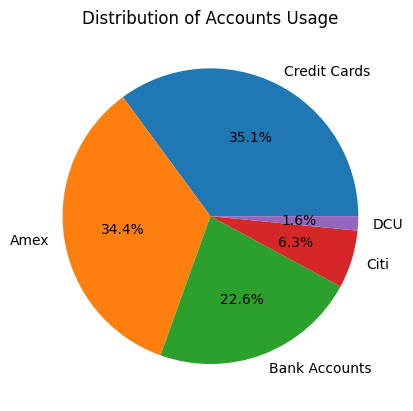

In [29]:
counts = ourdata['Accounts'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Accounts Usage')
plt.show()

In [30]:
# most commonly used are amex and creditcards

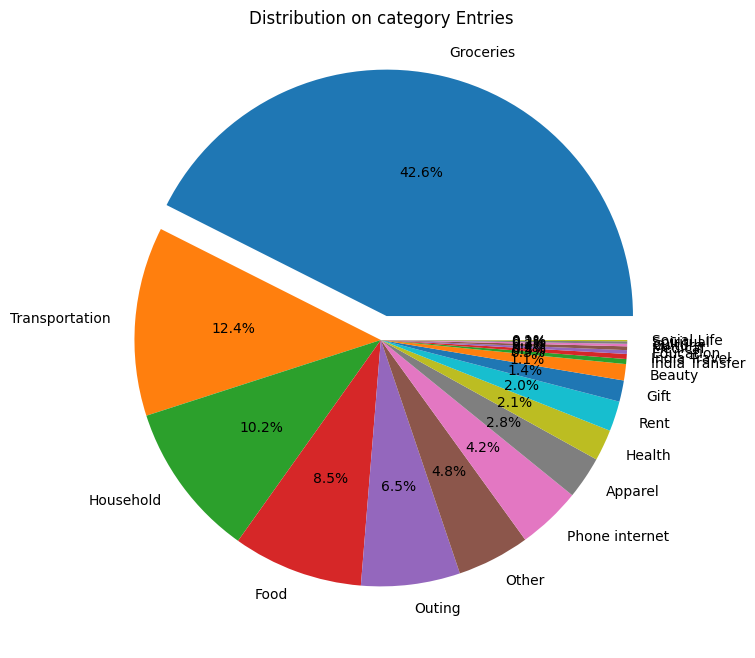

In [31]:
category_counts = ourdata['Category'].value_counts()
explode = [0.1 if count == category_counts.max() else 0 for count in category_counts]
plt.figure(figsize=(10,8))
plt.pie(x=category_counts, labels=category_counts.index, autopct='%1.1f%%', explode=explode)
plt.title('Distribution on category Entries')
plt.show()
#most entries in the excel are for groceries and transportation

In [32]:
ourdata.head()

,Period,Accounts,Category,Subcategory,Note,Amount,Description,Year,Month
0,2023-12-31,Amex,Groceries,missing,Walmart,25.51,WAL-MART SUPERCENTERLITTLE ROCK AR,2023,12
1,2023-12-31,Amex,Groceries,missing,Indian Market,26.63,INDIAN MARKET LITTLE ROCK AR,2023,12
2,2023-12-31,Amex,Groceries,missing,Indian Market,3.78,INDIAN MARKET LITTLE ROCK AR,2023,12
3,2023-12-30,Amex,Spiritual,missing,Temple,12.25,WAL-MART SUPERCENTERLITTLE ROCK AR,2023,12
4,2023-12-30,Amex,Groceries,missing,Trader's Joe,38.42,TRADER JOE S #756 00LITTLE ROCK AR,2023,12


## Spend Analysis

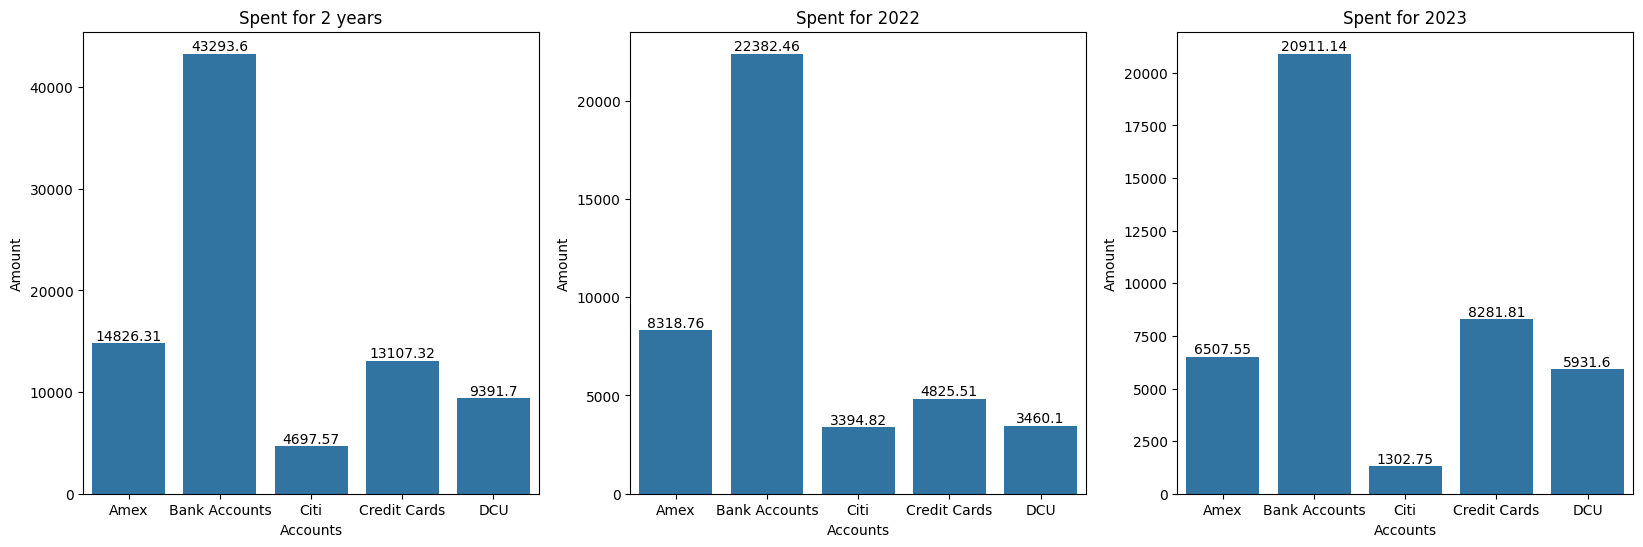

In [33]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
ourdata['Period']=pd.to_datetime(ourdata['Period'])
period2022=ourdata[ourdata['Period'].dt.year==2022]
period2023=ourdata[ourdata['Period'].dt.year==2023]
acc_amt=ourdata.groupby(['Accounts'])['Amount'].sum().reset_index()
amt_2022=period2022.groupby(['Accounts'])['Amount'].sum().reset_index()
amt_2023=period2023.groupby(['Accounts'])['Amount'].sum().reset_index()
sns.barplot(x='Accounts', y='Amount', data=acc_amt,ax=ax[0])
ax[0].set_title('Spent for 2 years')
for index, row in acc_amt.iterrows():
    ax[0].text(index, row['Amount'], str(row['Amount']), ha='center', va='bottom')
    
sns.barplot(x='Accounts', y='Amount', data=amt_2022,ax=ax[1])
ax[1].set_title('Spent for 2022')
for index, row in amt_2022.iterrows():
    ax[1].text(index, row['Amount'], str(row['Amount']), ha='center', va='bottom')
    
sns.barplot(x='Accounts', y='Amount', data=amt_2023,ax=ax[2])
ax[2].set_title('Spent for 2023')
for index, row in amt_2023.iterrows():
    ax[2].text(index, row['Amount'], str(row['Amount']), ha='center', va='bottom')
plt.show()
#Lot of money withdrawal happens from bankaccounts (topping the list), least being citi

In [34]:
spent2022=period2022['Amount'].sum()
print('Amount spent in the year 2022 :',round(spent2022,2))
spent2023=period2023['Amount'].sum()
print('Amount spent in the year 2023 :',round(spent2023,2))
totalspent=ourdata['Amount'].sum()
print('Amount spent in the totally :',totalspent)
#because of inflation we have spent 553 additionally in the year 2023

Amount spent in the year 2022 : 42381.65
Amount spent in the year 2023 : 42934.85
Amount spent in the totally : 85316.5


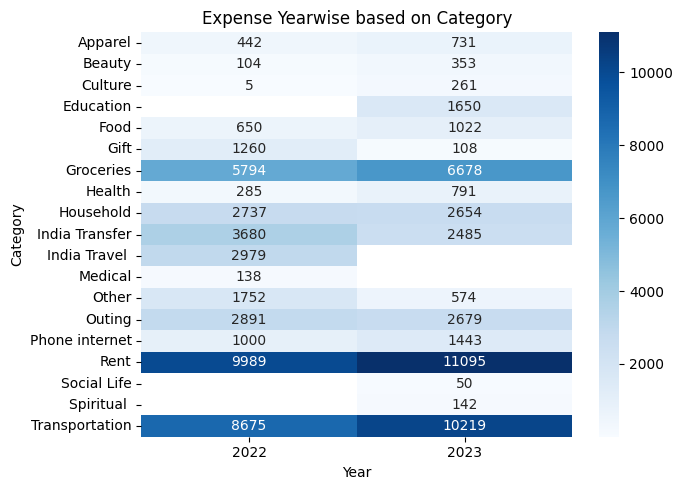

In [35]:
plt.figure(figsize=(7,5),dpi=100)
corr_table=pd.pivot_table(data=ourdata,index='Category',columns='Year',values='Amount',aggfunc='sum')
sns.heatmap(corr_table,annot=True,fmt='0.0f',cmap='Blues')
plt.title('Expense Yearwise based on Category')
plt.tight_layout()
plt.show()
#take aways
#no investment made in 2022, 2023 good amount is invested
#Rent & Transportation draws out huge money from our pocket, followed by grocery[ which is half of rent]
#the category where expense went down(in the year 2023) is Gift & India Transfer& Other,no india travel,
# More differenced categories== Rent,Transportation,groceries,food,phone internet
#no big change= household,outing
# new big expenses= education,then..culture,spiritual,social

In [36]:
ourdata['Subcategory'].nunique()

23

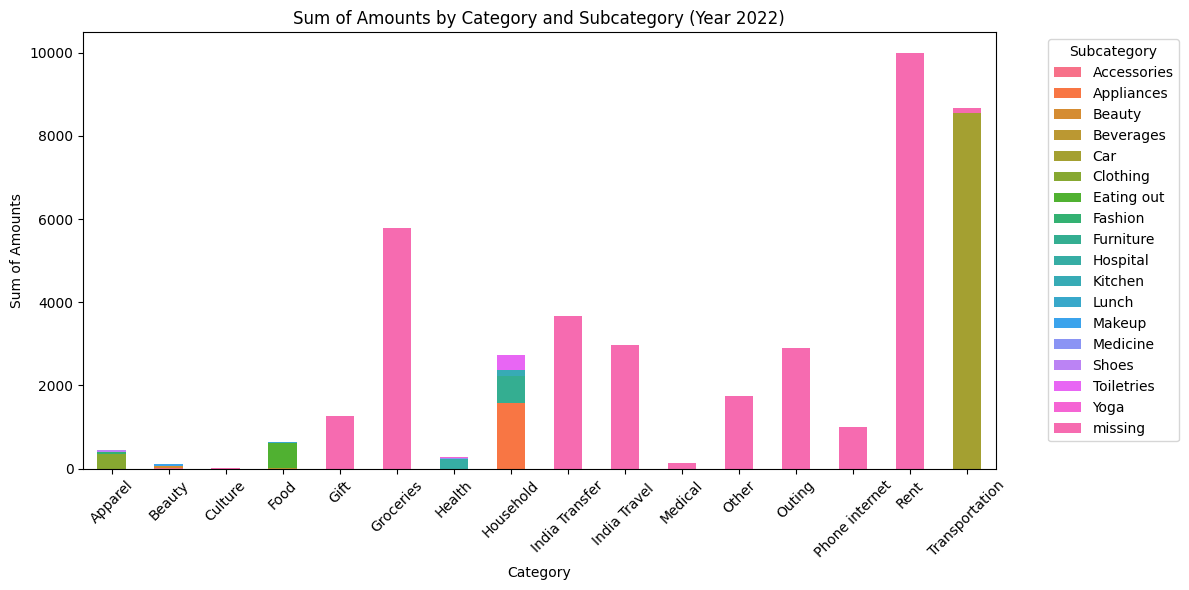

In [37]:
grouped_2022 = period2022.groupby(['Category', 'Subcategory'])['Amount'].sum().reset_index()


pivot_table = grouped_2022.pivot_table(index='Category', columns='Subcategory', values='Amount', aggfunc='sum', fill_value=0)
unique_colors = sns.color_palette("husl", n_colors=len(pivot_table.columns))
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6),color=unique_colors)
plt.title('Sum of Amounts by Category and Subcategory (Year 2022)')
plt.xlabel('Category')
plt.ylabel('Sum of Amounts')
plt.xticks(rotation=45)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

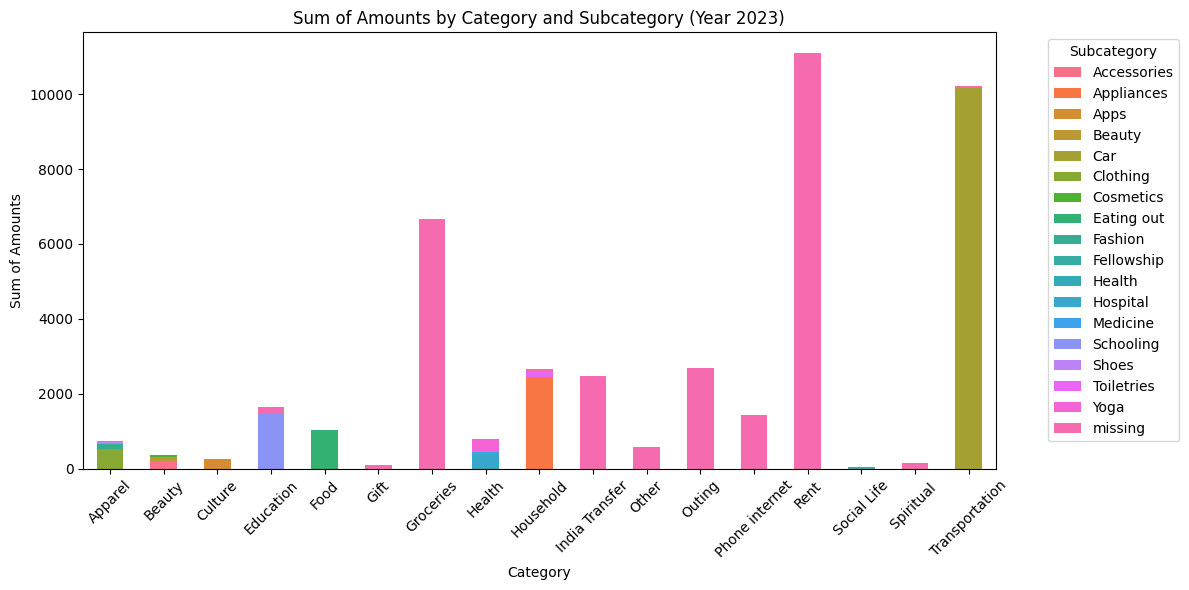

In [38]:
grouped_2023= period2023.groupby(['Category', 'Subcategory'])['Amount'].sum().reset_index()


pivot_2023 = grouped_2023.pivot_table(index='Category', columns='Subcategory', values='Amount', aggfunc='sum', fill_value=0)
unique_colors = sns.color_palette("husl", n_colors=len(pivot_2023.columns))
pivot_2023.plot(kind='bar', stacked=True, figsize=(12, 6),color=unique_colors)
plt.title('Sum of Amounts by Category and Subcategory (Year 2023)')
plt.xlabel('Category')
plt.ylabel('Sum of Amounts')
plt.xticks(rotation=45)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Vendor Analysis

In [39]:
ourdata.at[334, 'Note'] = 'Hertz'
ourdata.at[733, 'Note'] = 'Alamo'
ourdata.at[437,'Note']='TRAVEL HILTONGAR'

In [40]:
ourdata['newnote'] = ourdata['Note']
import re
patterns = {
    "walmart": r'walm|wal-',
    "Kroger":r'kro.',
    "Indian Store":r'indian m|indian g.|india b',
    "Zelle":r'zel.',
    "Trader Joe":r'Trade.',
    "costco gas":r'costco ga.',
    "cinemark":r'cine.',
    "moneyline":r'moneyline',
    "DollarTree":r'dollar.',
    "Shell":r'shell',
    "Belk":r'belk',
    "Carter":r'carter',
    "Grove":r'grove',
    "Amazon":r'amzn|amaz.',
    "Asian store":r'asi.',
    "Comcast":r'comcast',
    "Costco":r'costco',
    "JCPenny":r'PENNEY|jc',
    "Southern Farm":r'Southern Farm.',
    "StarBucks":r'Starbuck.',
    "Summit":r'Summit.',
    "Laundry":r'my laundry',
    "Centerpoint":r'center.',
    "ChenalValley":r'Chenal.',
    "Super Cuts":r'Super',
    "Yoga":r'yoga.',
    "Grove":r'rent|grove',
    "nothing bundt":r'.nothing.',
    "LocalLime":r'lime',
    "OLive Garden":r'olive',
    "Walgreen":r'walgreen.'
}


# Loop through patterns and notes

for i, note in enumerate(ourdata['Note']):
    if i < len(ourdata):
     for key, value in patterns.items():
        newvalue = re.compile(value, re.IGNORECASE)
        match = newvalue.search(str(note)) 
        if match:
            ourdata.loc[i, 'newnote'] = key
            break
        
                
        
  

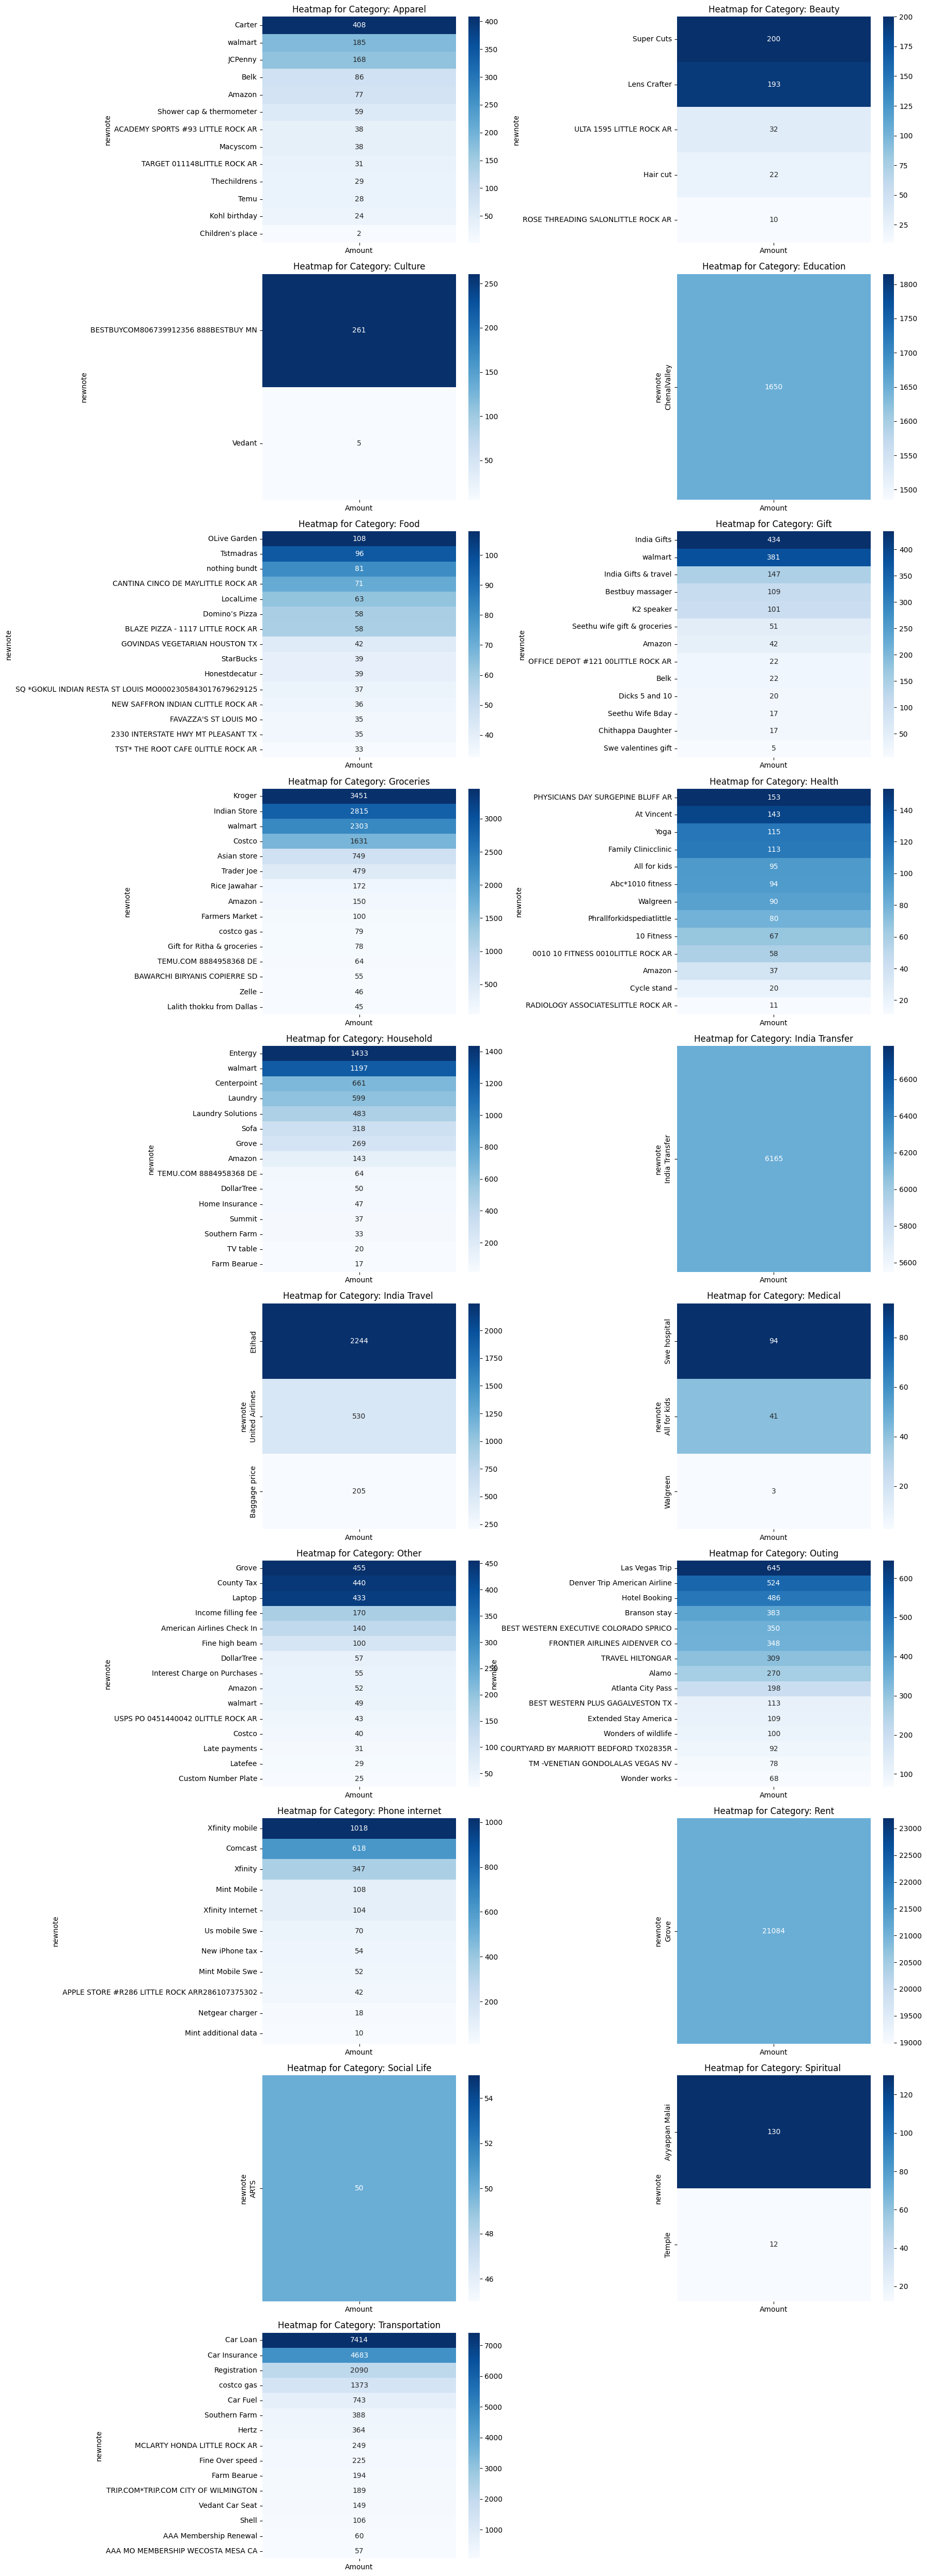

In [41]:
vendor=ourdata.groupby(['Category','newnote'])['Amount'].sum().reset_index()
categories = vendor['Category'].unique()

# Define the number of columns for the subplots
cols = 2

# Calculate the number of rows needed
rows = -(-len(categories) // cols)  # ceiling division to ensure we have enough rows

# Create subplots with the calculated number of rows and 2 columns
fig, ax = plt.subplots(rows, cols, figsize=(18, rows*5), dpi=100)

# Flatten the ax array for easier indexing
ax = ax.flatten()

# Iterate over each category
for i, category in enumerate(categories):
    # Filter the DataFrame for the current category
    filtered_df = vendor[vendor['Category'] == category]
    
    # Create a pivot table for the current category
    pivot_table = pd.pivot_table(data=filtered_df, index='newnote', values='Amount', aggfunc='sum').fillna(0)
    top_15_pivot_table = pivot_table.nlargest(15, columns='Amount')
    # Plot the heatmap for the current category
    sns.heatmap(top_15_pivot_table, annot=True, fmt='.0f', cmap='Blues', ax=ax[i])
    
    # Set title for the subplot
    ax[i].set_title(f'Heatmap for Category: {category}')

# Remove any extra empty subplots
for j in range(len(categories), rows*cols):
    fig.delaxes(ax[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

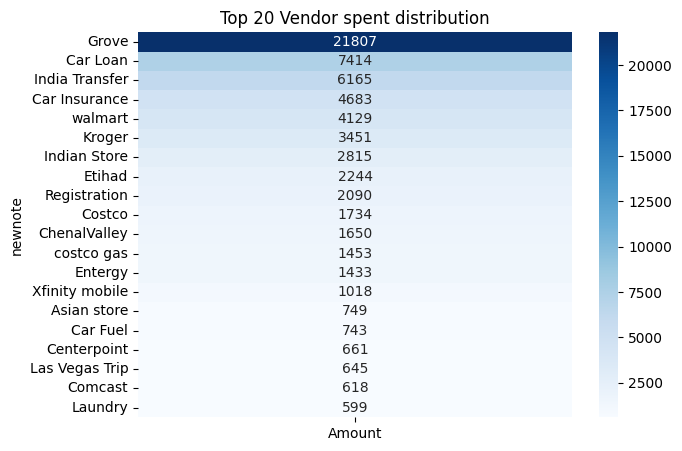

In [42]:
vendor_table = pd.pivot_table(data=vendor, index='newnote', values='Amount', aggfunc='sum').fillna(0)
top_20_vendor= vendor_table.nlargest(20, columns='Amount')
plt.figure(figsize=(7, 5))
sns.heatmap(top_20_vendor, annot=True, fmt='.0f', cmap='Blues')
plt.title("Top 20 Vendor spent distribution")
plt.show()

## Seasonal Analysis- month wise

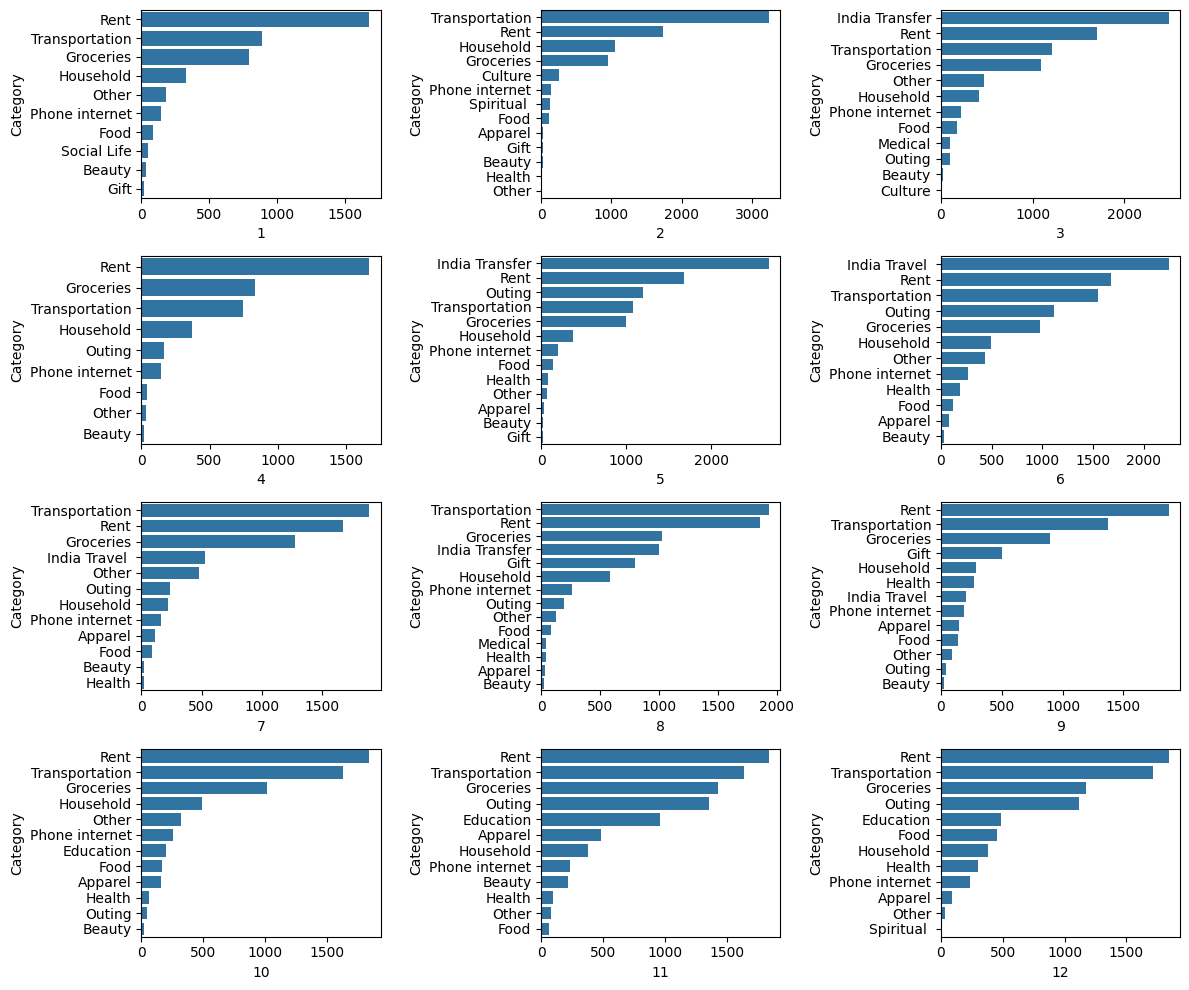

In [43]:

ourdata['Period'] = pd.to_datetime(ourdata['Period'])


monthly_pivot_tables = {}
  

for month in range(1, 13):
    monthly_data = ourdata[ourdata['Month'] == month]
    month_table = pd.pivot_table(data=monthly_data, index='Category', columns='Month', values='Amount', aggfunc='sum').fillna(0)
    monthly_pivot_tables[month] = month_table
    
fig,ax=plt.subplots(4,3,figsize=(12,10))
ax=ax.flatten()
for i,(month,month_table) in enumerate(monthly_pivot_tables.items()):
    sorted_categories = month_table[month].sort_values(ascending=False).index
    sns.barplot(x=month_table.loc[sorted_categories, month], y=sorted_categories, ax=ax[i], orient='h')
    plt.tight_layout()
plt.show()

In [44]:
#more expense happens in March and November

In [45]:
monthly_df = pd.concat(monthly_pivot_tables.values(), axis=1).fillna(0)

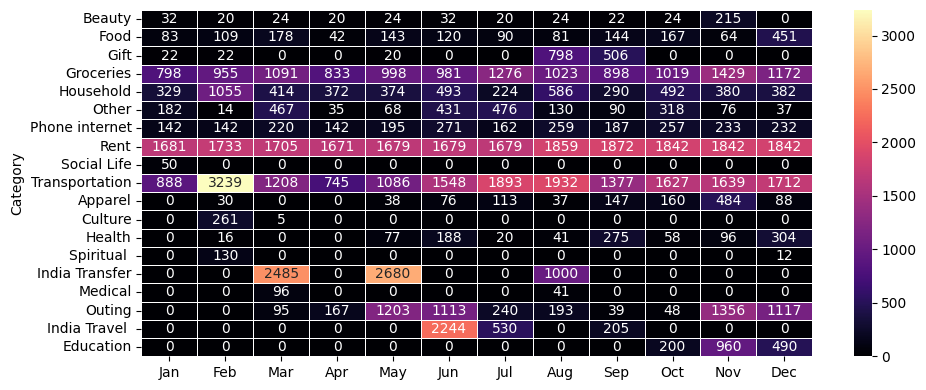

In [46]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_df.columns=months
monthly_df
plt.figure(figsize=(10, 4))
sns.heatmap(monthly_df, annot=True, fmt='.0f', cmap='magma', linewidths=.5)
plt.tight_layout()
plt.show()

## Outlier detection
#Beauty- high in November?===LensCrafter
#Food-spent more in dec- may be coz of trip
#gift -expenditure is higher before travel to india
#Groceries-Nov is higher == Las vegas eat out
#Household- (Feb much is much higher??-unexpected home expense(sofa,Tyre)
#Transportation -why Feb is much higher? - car registration and fine
#Apparel-nov because of thanksgiving
#Health-dec n sep(flu season)
#india tansfer- mar(courrier), may=?(Need to check )
#Outing-may june nov dec- trips
#Phone internet- offer. price down,,no offer price up. so its full of up n downs

In [47]:
ourdata.loc[(ourdata['Month'] == 12) & (ourdata['Category'] == 'Phone internet'), ['newnote','Amount','Year','Description']]


,newnote,Amount,Year,Description
8,Xfinity Internet,52.00,2023,COMCAST 800-266-2278 GA1G6H191109585100
54,Xfinity mobile,65.90,2023,missing
667,Comcast,49.00,2022,_x000D_
706,Xfinity mobile,65.42,2022,missing


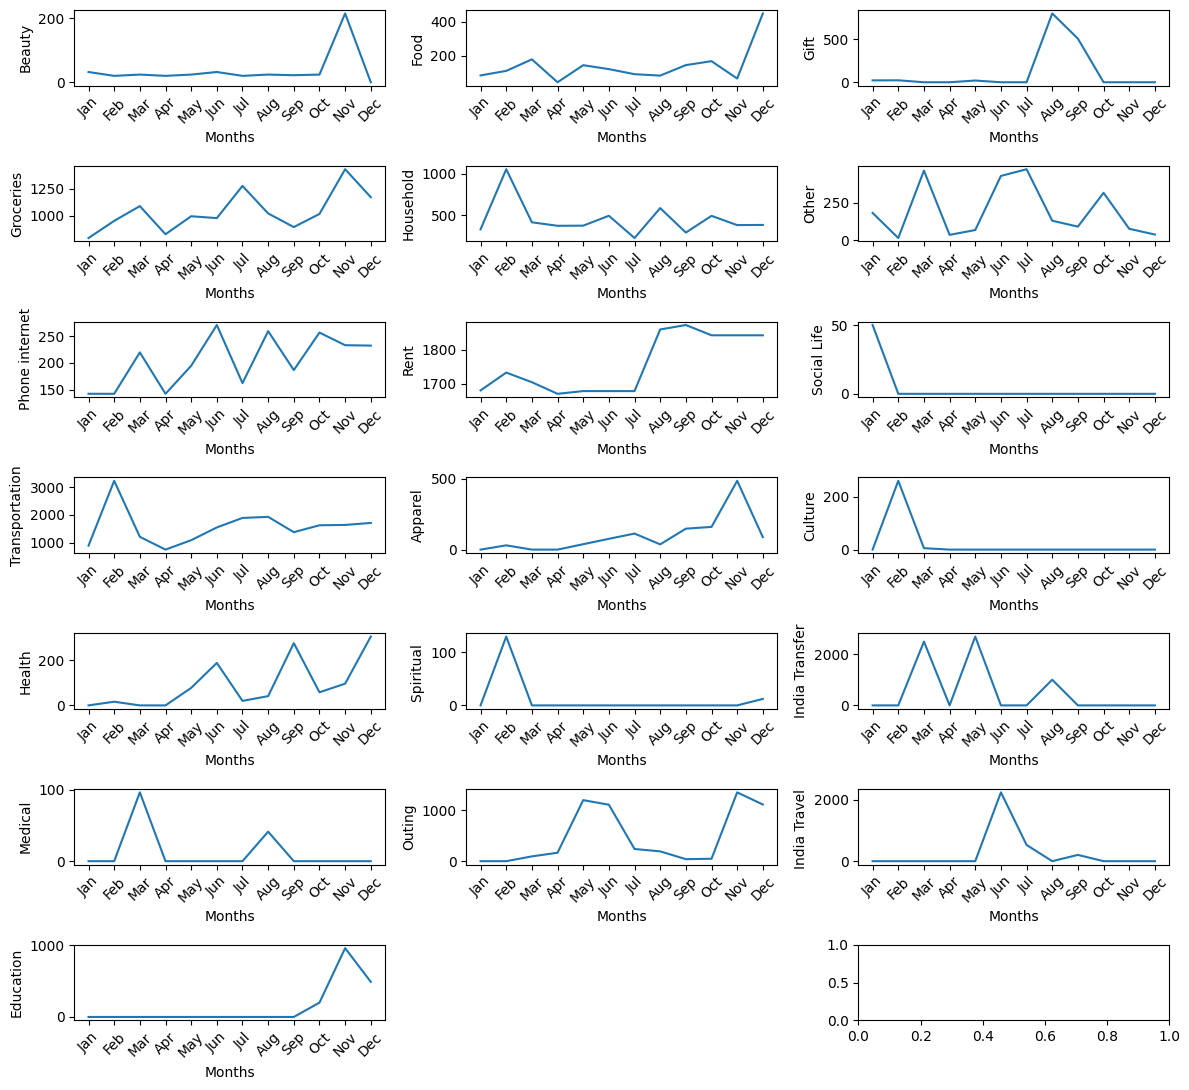

In [48]:
col = 3
row = -(-len(monthly_df.index) // col)
fig,ax=plt.subplots(row,col,figsize=(12,11))
ax=ax.flatten()
for i, (index, row) in enumerate(monthly_df.iterrows()):
    sns.lineplot(x=monthly_df.columns, y=row, ax=ax[i])
    ax[i].tick_params(axis='x',rotation=45)
    ax[i].set_xlabel('Months')
for j in range(len(monthly_df.index), rows*cols):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

## seasonal expense outlook

In [49]:
summer=ourdata[ourdata['Month'].isin([4,5,6,7,8,9])]
winter=ourdata[ourdata['Month'].isin([1,2,3,10,11,12])]

In [50]:

pivot_summer = pd.pivot_table(data=summer, index='Category', values='Amount', aggfunc='sum').fillna(0)
pivot_winter = pd.pivot_table(data=winter, index='Category', values='Amount', aggfunc='sum').fillna(0)

In [51]:
sum_win=pd.concat([pivot_summer,pivot_winter],axis=1,ignore_index=True).fillna(0)
sum_win.rename(columns={0:'Summer',1:'Winter'},inplace=True)
print(sum_win)

                  Summer    Winter
Category                          
Apparel           411.15    761.79
Beauty            142.04    315.22
Food              620.03   1051.64
Gift             1323.79     44.20
Groceries        6008.44   6464.01
Health            601.08    474.46
Household        2339.29   3052.53
India Transfer   3680.00   2485.00
India Travel     2979.00      0.00
Medical            41.30     96.30
Other            1231.37   1094.41
Outing           2954.98   2615.44
Phone internet   1215.98   1226.37
Rent            10439.00  10644.90
Transportation   8581.30  10313.11
Culture             0.00    266.12
Education           0.00   1650.00
Social Life         0.00     50.00
Spiritual           0.00    142.25


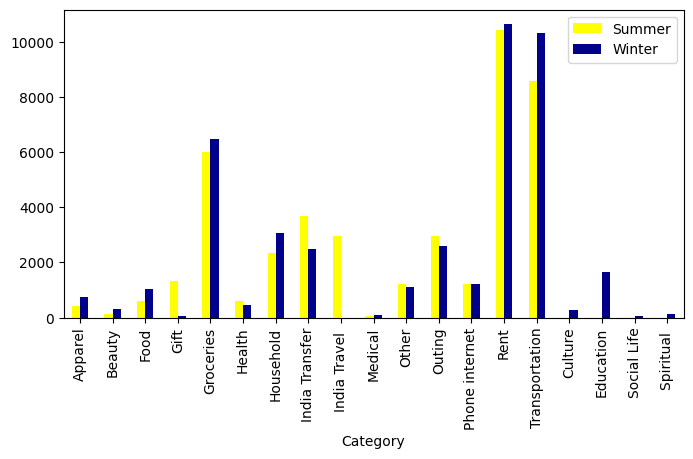

In [52]:
sum_win.plot(kind='bar',figsize=(8,4),color=('yellow','darkblue'))
plt.show()

In [53]:
#most of the expenses are bit higher in winter..since inflation started late summer

## Finding Correlation between expenses:=


Text(0.5, 1.0, 'Plot of Amount for Groceries and Food')

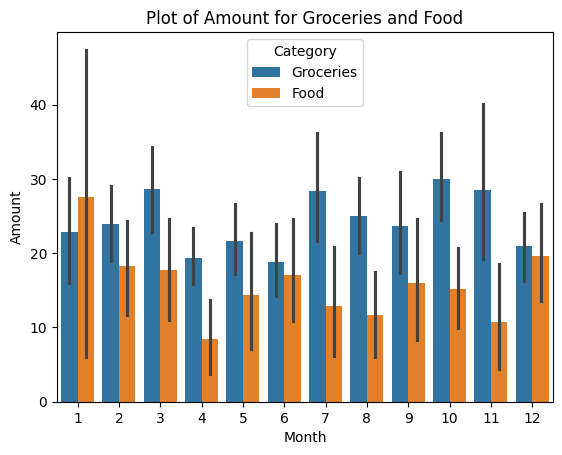

In [54]:
groceries = ourdata[ourdata['Category'] == 'Groceries']
food = ourdata[ourdata['Category'] == 'Food']

combined_data = pd.concat([groceries, food])

sns.barplot(data=combined_data, x='Month',y='Amount', hue='Category')
plt.title('Plot of Amount for Groceries and Food')
#mostly grocery more food less, jan & Dec[chikki bday party food] alone opposite, 3,4 5 less grocery for 2022 cox of covid

Text(0.5, 1.0, 'Plot of Amount for transport and outing')

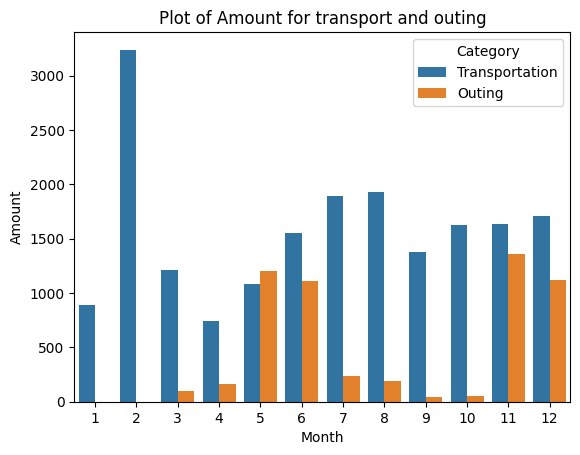

In [55]:
transport = ourdata[ourdata['Category'] == 'Transportation']
outing = ourdata[ourdata['Category'] == 'Outing']

trans_out= pd.concat([transport, outing])
grouped_transout=trans_out.groupby(['Category','Month'])['Amount'].sum().reset_index()
sns.barplot(data=grouped_transout, x='Month',y='Amount', hue='Category')
plt.title('Plot of Amount for transport and outing')

In [56]:
unique_categories = ourdata['Category'].unique()
df=[]
# Iterate over each category
for category in unique_categories:
    # Extract data for the current category and the column of interest
    category_data = ourdata.loc[ourdata['Category'] == category,['Category','Amount']]
    df.append(category_data)
combined_data = pd.concat(df)
newdata=combined_data.pivot(columns='Category',values='Amount').fillna(0)
newdata

Category,Apparel,Beauty,Culture,Education,Food,Gift,Groceries,Health,Household,India Transfer,India Travel,Medical,Other,Outing,Phone internet,Rent,Social Life,Spiritual,Transportation
0,0.0,0.0,0.0,0.0,0.0,0.0,25.51,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,26.63,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.78,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,12.25,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,38.42,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,9.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
1213,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,149.0
1214,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,60.26,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
1215,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,44.95,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0


In [57]:
#negatively correlated - groceries and food,groceries and household

In [58]:
table=pd.pivot_table(data=period2022,index='Category',columns='Month',values='Amount',aggfunc='sum').fillna(0)
column_total=table.sum(axis=0)
table.loc['Total']=column_total
table

Month,1,2,3,4,5,6,7,8,9,10,11,12
Category,,,,,,,,,,,,
Apparel,0.00,0.00,0.00,0.00,0.00,59.00,112.83,36.91,0.00,97.02,48.86,87.75
Beauty,0.00,20.00,0.00,20.00,0.00,0.00,20.00,0.00,22.00,0.00,22.00,0.00
Culture,0.00,0.00,5.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Food,6.01,20.80,56.50,28.40,38.43,14.42,46.08,50.50,53.66,99.00,22.14,213.66
Gift,0.00,22.49,0.00,0.00,19.85,0.00,0.00,755.92,461.36,0.00,0.00,0.00
Groceries,160.19,395.55,471.21,275.49,479.91,444.53,603.63,554.62,353.75,533.98,907.34,613.97
Health,0.00,0.00,0.00,0.00,77.32,187.70,20.00,0.00,0.00,0.00,0.00,0.00
Household,175.34,845.06,177.81,245.22,196.85,280.33,156.64,275.09,127.50,65.01,132.68,59.95
India Transfer,0.00,0.00,0.00,0.00,2680.00,0.00,0.00,1000.00,0.00,0.00,0.00,0.00


In [59]:
table2=pd.pivot_table(data=period2023,index='Category',columns='Month',values='Amount',aggfunc='sum').fillna(0)
column_total=table2.sum(axis=0)
table2.loc['Total']=column_total
table2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Category,,,,,,,,,,,,
Apparel,0.00,30.03,0.00,0.00,38.01,16.95,0.00,0.00,147.45,62.69,435.44,0.00
Beauty,32.00,0.00,24.00,0.00,24.00,32.04,0.00,24.00,0.00,24.00,193.22,0.00
Culture,0.00,260.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,960.00,490.00
Food,76.64,88.65,121.38,13.54,104.80,105.49,43.72,30.88,90.11,68.03,41.95,236.88
Gift,21.71,0.00,0.00,0.00,0.00,0.00,0.00,42.31,44.35,0.00,0.00,0.00
Groceries,637.67,559.86,619.40,557.20,517.70,536.02,672.09,468.87,544.63,484.82,521.59,558.43
Health,0.00,16.28,0.00,0.00,0.00,0.00,0.00,40.92,275.14,57.90,96.13,304.15
Household,153.72,209.59,236.27,126.86,176.88,212.68,67.71,310.61,162.92,427.01,247.66,322.43


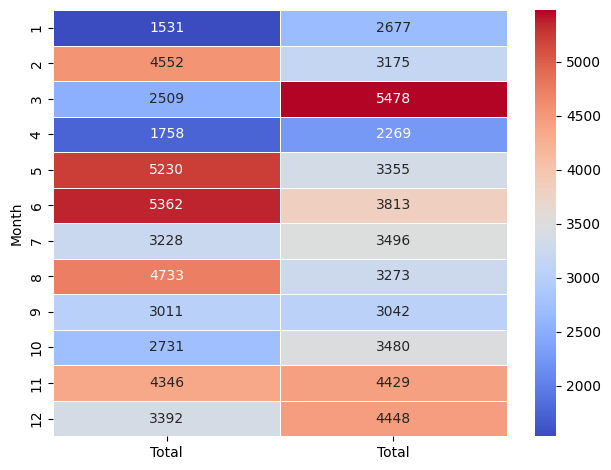

In [60]:
total_row_table1 = table.loc['Total']
total_row_table2 = table2.loc['Total']

# Concatenate the 'Total' rows
concatenated_totals = pd.concat([total_row_table1, total_row_table2],axis=1)

sns.heatmap(concatenated_totals,annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.tight_layout()
plt.show()

In [61]:
sum=concatenated_totals.sum(axis=0)
avg=sum/12
concatenated_totals.loc['average']=avg

In [62]:
concatenated_totals

,Total,Total
Month,,
1,1530.520000,2676.650000
2,4551.660000,3175.030000
3,2509.470000,5478.270000
4,1758.250000,2268.880000
5,5229.520000,3354.740000
6,5361.740000,3813.210000
7,3228.080000,3495.770000
8,4732.700000,3272.650000
9,3010.930000,3042.280000


In [63]:
ourdata.head()

,Period,Accounts,Category,Subcategory,Note,Amount,Description,Year,Month,newnote
0,2023-12-31,Amex,Groceries,missing,Walmart,25.51,WAL-MART SUPERCENTERLITTLE ROCK AR,2023,12,walmart
1,2023-12-31,Amex,Groceries,missing,Indian Market,26.63,INDIAN MARKET LITTLE ROCK AR,2023,12,Indian Store
2,2023-12-31,Amex,Groceries,missing,Indian Market,3.78,INDIAN MARKET LITTLE ROCK AR,2023,12,Indian Store
3,2023-12-30,Amex,Spiritual,missing,Temple,12.25,WAL-MART SUPERCENTERLITTLE ROCK AR,2023,12,Temple
4,2023-12-30,Amex,Groceries,missing,Trader's Joe,38.42,TRADER JOE S #756 00LITTLE ROCK AR,2023,12,Trader Joe


In [64]:
ourdata.drop(columns=['Subcategory','Note','Description','Accounts','newnote'],inplace=True)

In [65]:
ourdata.head()

,Period,Category,Amount,Year,Month
0,2023-12-31,Groceries,25.51,2023,12
1,2023-12-31,Groceries,26.63,2023,12
2,2023-12-31,Groceries,3.78,2023,12
3,2023-12-30,Spiritual,12.25,2023,12
4,2023-12-30,Groceries,38.42,2023,12


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ourdata['Amount']=scaler.fit_transform(ourdata[['Amount']])

In [67]:
ourdata.columns

Index(['Period', 'Category', 'Amount', 'Year', 'Month'], dtype='object')

In [68]:
# Convert 'Period' to datetime
ourdata['Period'] = pd.to_datetime(ourdata['Period'])
ourdata.set_index('Period', inplace=True)

# Aggregate expenses by month and category
monthly_expenses = ourdata.groupby([pd.Grouper(freq='M'), 'Category'])['Amount'].sum().reset_index()
monthly_expenses.columns = ['Date', 'Category', 'Amount']

# Pivot the data to have categories as columns
pivot_data = monthly_expenses.pivot_table(index='Date', columns='Category', values='Amount', fill_value=0).reset_index()
pivot_data.columns.name = None  # Remove the column name

# Split into training and testing sets (2022 and 2023)
train = pivot_data
test = pd.DataFrame()  # No future data, so leave this empty or prepare for future data if available

# 1. Linear Regression Model
print("Linear Regression Model:")
# Prepare features for Linear Regression
X_train = train.drop(columns=['Date'])
y_train = X_train.pop('Groceries')  # Predicting Groceries expenses

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions (if future data is available, use it here)
# For demonstration, we will use the same data for predictions
y_pred = model_lr.predict(X_train)

# Evaluate
mse_lr = mean_squared_error(y_train, y_pred)
print(f'Linear Regression MSE: {mse_lr}')

Linear Regression Model:
Linear Regression MSE: 1.7561532989273179


In [69]:
pivot_data

,Date,Apparel,Beauty,Culture,Education,Food,Gift,Groceries,Health,Household,India Transfer,India Travel,Medical,Other,Outing,Phone internet,Rent,Social Life,Spiritual,Transportation
0,2022-01-31,0.000000,0.000000,0.000000,0.000000,-0.338065,0.000000,-1.003900,0.000000,-0.554225,0.000000,0.000000,0.000000,-0.202077,0.000000,-0.237902,3.828497,0.000000,0.000000,0.294435
1,2022-02-28,0.000000,-0.264275,0.000000,0.000000,-0.260055,-0.620907,-4.569436,0.000000,0.020110,0.000000,0.000000,0.000000,-0.666742,0.000000,-0.334763,4.002820,0.000000,0.000000,10.431440
2,2022-03-31,0.000000,0.000000,-0.341125,0.000000,-1.550816,0.000000,-5.279662,0.000000,-0.910963,0.000000,0.000000,-0.231593,1.593078,-0.451911,-0.475804,3.986733,0.000000,0.000000,0.258896
3,2022-04-30,0.000000,-0.264275,0.000000,0.000000,-0.959499,0.000000,-5.202697,0.000000,-0.925172,0.000000,0.000000,0.000000,-0.611201,-0.969774,-0.552285,3.776015,0.000000,0.000000,-1.286847
4,2022-05-31,0.000000,0.000000,0.000000,0.000000,-1.646127,-0.265066,-5.233773,-0.331704,-0.810536,13.396211,0.000000,0.000000,-0.399324,0.901430,-0.554553,3.818212,0.000000,0.000000,0.220223
5,2022-06-30,-0.058568,0.000000,0.000000,0.000000,-0.293707,0.000000,-3.941325,-0.119267,-1.479514,0.000000,11.466281,0.000000,1.153477,0.000000,-0.300605,3.818212,0.000000,0.000000,2.875295
6,2022-07-31,-0.514171,-0.264275,0.000000,0.000000,-0.866246,0.000000,-4.581208,-0.264275,-0.283094,0.000000,2.425736,0.000000,-0.603342,-0.344363,-0.502652,3.818212,0.000000,0.000000,1.257545
7,2022-08-31,-0.544848,0.000000,0.000000,0.000000,-1.212698,2.508061,-4.469948,0.000000,-0.397856,4.904765,0.000000,-0.151927,-1.607116,-0.090732,-0.732135,3.976448,0.000000,0.000000,1.704129
8,2022-09-30,0.000000,-0.253726,0.000000,0.000000,-1.565796,-0.154900,-2.571319,0.000000,-0.806559,0.000000,0.341748,0.000000,-0.764764,-0.296186,-0.375588,4.424783,0.000000,0.000000,1.633872
9,2022-10-31,-0.227796,0.000000,0.000000,0.000000,-1.696414,0.000000,-3.839283,0.000000,-0.396634,0.000000,0.000000,0.000000,-0.918547,0.000000,-0.006371,4.266547,0.000000,0.000000,1.324489



ARIMA Model:


C:\Users\kalya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kalya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kalya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


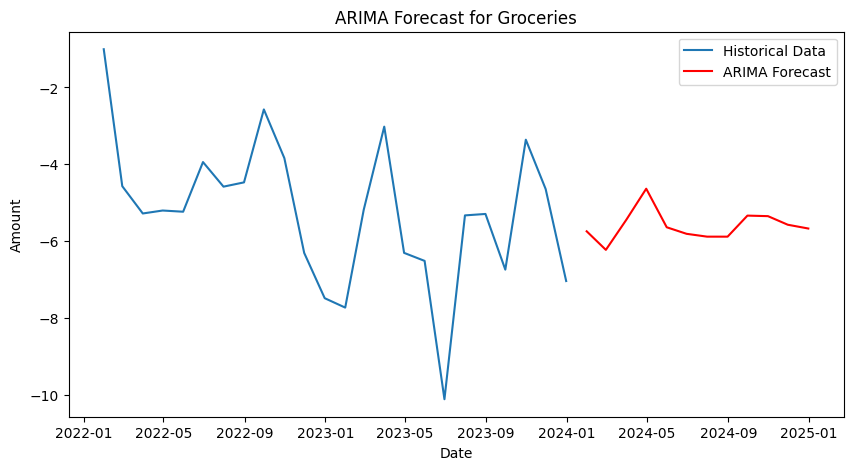

In [70]:
print("\nARIMA Model:")
# For ARIMA, use the 'Groceries' column
train_arima = train[['Date', 'Groceries']].set_index('Date')
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_arima = ARIMA(train_arima, order=(5, 1, 0))  # Adjust (p, d, q) as necessary
model_arima_fit = model_arima.fit()

# Forecast for demonstration (use future dates if available)
forecast_arima = model_arima_fit.forecast(steps=12)
forecast_arima_index = pd.date_range(start='2024-01-01', periods=12, freq='M')
forecast_arima_series = pd.Series(forecast_arima, index=forecast_arima_index)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_arima.index, train_arima['Groceries'], label='Historical Data')
plt.plot(forecast_arima_series.index, forecast_arima_series, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for Groceries')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Note: Since we don't have future test data, evaluation is skipped here.


In [72]:
print("\nProphet Model:")
# Prepare data for Prophet
prophet_data = pivot_data[['Date', 'Groceries']]
prophet_data.columns = ['ds', 'y']
from fbprophet import Prophet
# Fit Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Create future dataframe
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)

# Plot results
fig = model_prophet.plot(forecast)
plt.title('Prophet Forecast for Groceries')
plt.show()


Prophet Model:


ModuleNotFoundError: No module named 'fbprophet'